<a href="https://colab.research.google.com/github/shreevigneshs/UCSC-220/blob/main/assignments/220_assignment_1_problem_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [3]:
csv_path = "/content/drive/MyDrive/NLP220/assignments/q2_imdb/q2_imdb_combined_data.csv"

In [4]:
df = pd.read_csv(csv_path, encoding='utf-8')

In [5]:
df.tail()

,text,sentiment
49995,With actors like Depardieu and Richard it is r...,negative
49996,If you like to get a couple of fleeting glimps...,negative
49997,When something can be anything you want it to ...,negative
49998,"I had heard good things about ""States of Grace...",negative
49999,"Well, this movie actually did have one redeemi...",negative


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [7]:
from sklearn.model_selection import train_test_split
random_state = 20221016
X_train, X_test, y_train, y_test = train_test_split(df.text, df.sentiment, test_size=0.1, random_state=random_state, shuffle=True)

In [8]:
data={"count": [len([1 for _y in y_train if _y == 'positive']), len([1 for _y in y_train if _y == 'negative']), len([1 for _y in y_test if _y == 'positive']), len([1 for _y in y_test if _y == 'negative'])], "sentiment": ["positive", "negative"] * 2, "split": ["train", "train", "test", "test"]}
split_df = pd.DataFrame(columns=["sentiment", "count", "split"], data=data)
split_df

,sentiment,count,split
0,positive,22542,train
1,negative,22458,train
2,positive,2458,test
3,negative,2542,test


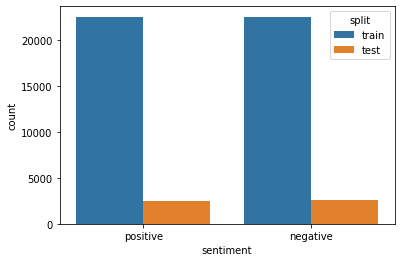

In [9]:
import seaborn as sns

sns.barplot(data=split_df, x="sentiment", y="count", hue="split")

In [10]:
# feature engineering = TF-IDF with ngrams range (1, 2) (unigrams and bigrams)

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn import metrics

pipeline_1 = Pipeline(
    [
        ("vect", CountVectorizer(ngram_range=(1,2))),
        ("clf", MultinomialNB()),
    ]
)

pipeline_2 = Pipeline(
    [
        ("vect", CountVectorizer(ngram_range=(1,2))),
        ("clf", tree.DecisionTreeClassifier()),
    ]
)

pipeline_3 = Pipeline(
    [
        ("vect", CountVectorizer(ngram_range=(1,2))),
        ("clf", LogisticRegression()),
    ]
)

pipeline_4 = Pipeline(
    [
        ("vect", CountVectorizer(ngram_range=(1,2))),
        ("clf", KNeighborsClassifier()),
    ]
)

pipeline_5 = Pipeline(
    [
        ("vect", CountVectorizer(ngram_range=(1,2))),
        ("clf", RandomForestClassifier()),
    ]
)

In [11]:
# for multinomial naive bayes

pipeline_1.fit(X_train, y_train)
predicted_1 = pipeline_1.predict(X_test)
print("Classification Report Pipeline 1 (Count Vectorizer + Naive Bayes)")
print("Avg Accuracy: {}".format(np.mean(predicted_1 == y_test)))
print(metrics.classification_report(y_test, predicted_1))

Classification Report Pipeline 1 (Count Vectorizer + Naive Bayes)
Avg Accuracy: 0.883
              precision    recall  f1-score   support

    negative       0.87      0.90      0.89      2542
    positive       0.89      0.86      0.88      2458

    accuracy                           0.88      5000
   macro avg       0.88      0.88      0.88      5000
weighted avg       0.88      0.88      0.88      5000



In [12]:
# for decision tree classifier

pipeline_2.fit(X_train, y_train)
predicted_2 = pipeline_2.predict(X_test)
print("Classification Report Pipeline 2 (Count Vectorizer + Decision Tree Classifier)")
print("Avg Accuracy: {}".format(np.mean(predicted_2 == y_test)))
print(metrics.classification_report(y_test, predicted_2))

Classification Report Pipeline 2 (Count Vectorizer + Decision Tree Classifier)
Avg Accuracy: 0.7276
              precision    recall  f1-score   support

    negative       0.73      0.73      0.73      2542
    positive       0.72      0.72      0.72      2458

    accuracy                           0.73      5000
   macro avg       0.73      0.73      0.73      5000
weighted avg       0.73      0.73      0.73      5000



In [13]:
# for Logistic Regressor

pipeline_3.fit(X_train, y_train)
predicted_3 = pipeline_3.predict(X_test)
print("Classification Report Pipeline 3 (Count Vectorizer + Logistic Regressor)")
print("Avg Accuracy: {}".format(np.mean(predicted_3 == y_test)))
print(metrics.classification_report(y_test, predicted_3))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Classification Report Pipeline 3 (Count Vectorizer + Logistic Regressor)
Avg Accuracy: 0.9096
              precision    recall  f1-score   support

    negative       0.92      0.90      0.91      2542
    positive       0.90      0.92      0.91      2458

    accuracy                           0.91      5000
   macro avg       0.91      0.91      0.91      5000
weighted avg       0.91      0.91      0.91      5000



In [14]:
# for KNeighbours Classifier

pipeline_4.fit(X_train, y_train)
predicted_4 = pipeline_4.predict(X_test)
print("Classification Report Pipeline 4 (Count Vectorizer + KNeighbors Classifier)")
print("Avg Accuracy: {}".format(np.mean(predicted_4 == y_test)))
print(metrics.classification_report(y_test, predicted_4))

Classification Report Pipeline 4 (Count Vectorizer + KNeighbors Classifier)
Avg Accuracy: 0.6188
              precision    recall  f1-score   support

    negative       0.63      0.60      0.62      2542
    positive       0.61      0.64      0.62      2458

    accuracy                           0.62      5000
   macro avg       0.62      0.62      0.62      5000
weighted avg       0.62      0.62      0.62      5000



In [15]:
# for Random Forest Classifier

pipeline_5.fit(X_train, y_train)
predicted_5 = pipeline_5.predict(X_test)
print("Classification Report Pipeline 5 (Count Vectorizer + Random Forest Classifier)")
print("Avg Accuracy: {}".format(np.mean(predicted_5 == y_test)))
print(metrics.classification_report(y_test, predicted_5))

Classification Report Pipeline 5 (Count Vectorizer + Random Forest Classifier)
Avg Accuracy: 0.8608
              precision    recall  f1-score   support

    negative       0.87      0.86      0.86      2542
    positive       0.85      0.86      0.86      2458

    accuracy                           0.86      5000
   macro avg       0.86      0.86      0.86      5000
weighted avg       0.86      0.86      0.86      5000



# Analysis

*   We have used the same featurization technique - Count Vectorizer with unigrams and bigrams (ngrams - (1, 2)) for all the different models.

*   We have tried the following 5 different models:
  *   K-Neighbours Classifier
  *   Decision Tree
  *   Random Forest
  *   Multinomial Naive Bayes
  *   Logistic Regressor

*   Out of these we see that
  *  Logistic Regressor has the highest accuracy (0.91).

  *  Multinomial Naive Bayes has the second-highest accuracy (0.88) with a minor drop of ~3% from the best model.
  *  Random Forest has the third-highest accuracy (0.86) with a drop of ~5% from the best model.
  * Decision Tree has the second least accuracy (0.73) with a huge drop of ~18% from the best model.
  * K-Neighbours has the least accuracy (0.62) with an enormous drop in performance of ~29% from the best model.
* The reason logistic regression performs better naive bayes is due to the fact that naive bayes treats the features as independent, whereas logistic regression looks at the interactions between them. So logistic regression is better at capturing dependence/interaction between features and outperforms naive bayes for this classification task.
* The reason decision tree performs poorly is due to the fact that they divide the decision space into squares so building clusters around things means it has to split a lot to encompass clusters of data. Also splitting a lot leads to complex trees which results in overfitting and the decision boundaries are not smooth. Random forest outperforms decision trees mainly because they are an ensemble of decision trees and due to this ensemble nature they avoid overfitting as they use multiple trees and take their average (in this case max voting) for prediction.
* KNeighbour Classification performs better in settings when the data is low and the feature vectors are such that there is a good notion of distance metric between two feature vectors. Here it performs wore than decision trees simply because we are using count vectorizers with ngrams - (1,2) to featurize data. So the feature vectors have very high dimension but are also sparse. So the distance between two feature vectors doesn’t give us a good notion of why the two feature vectors are similar or different. Better feature vectors like using pretrained embeddings like for words like word2vec, glove, fasttext etcmigh perform better here.
